<a href="https://colab.research.google.com/github/python-academy/AI_Demistified/blob/master/CNN_HandWriiten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

**Develop Convolutional Neural Network Models**

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


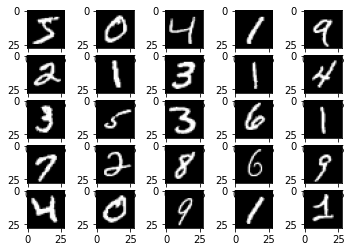

In [2]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Note that the images are arrays of grayscale pixel data; therefore, we must add a channel dimension to the data before we can use the images as input to the model. The reason is that CNN models expect images in a channels-last format, that is each example to the network has the dimensions [rows, columns, channels], where channels represent the color channels of the image data.

It is also a good idea to scale the pixel values from the default range of 0-255 to 0-1 when training a CNN. For more on scaling pixel values, see the tutorial:

In [3]:
# example of a cnn for image classification
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [4]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [6]:
print(y_test.shape)

(10000,)


In [7]:
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

(28, 28, 1) 10


In [8]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [10]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

In [12]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.987


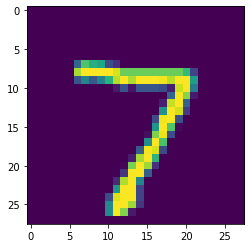

In [13]:
image = testX[0]
pyplot.imshow(image)
pyplot.show()

In [14]:
yhat = model.predict(x_test)

In [15]:
yhat[0]

array([9.69216721e-11, 1.46128540e-10, 6.89583004e-08, 1.47127386e-08,
       1.31284913e-10, 1.08080114e-12, 1.02130276e-16, 9.99999404e-01,
       1.89648353e-10, 4.96728546e-07], dtype=float32)

In [16]:
print(argmax(yhat[0]))

7


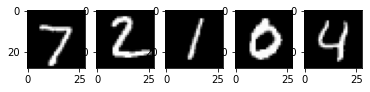

In [17]:
for i in range(5):
	# define subplot
	pyplot.subplot(1, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(testX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [18]:
for i in range(5):
  print(argmax(yhat[i]))

7
2
1
0
4
